# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1200

# Data

In [2]:
df = pd.read_csv('./Fraud_check.csv')
df

Undergrad Marital.Status  Taxable.Income  City.Population   
0          NO         Single           68833            50047  \
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
df.rename(columns={'Marital.Status':'MaritalStatus',
                  'Taxable.Income':'TaxableIncome',
                  'City.Population':'CityPopulation',
                  'Work.Experience':'WorkExperience'
                  },inplace=True)
df

Undergrad MaritalStatus  TaxableIncome  CityPopulation  WorkExperience   
0          NO        Single          68833           50047              10  \
1         YES      Divorced          33700          134075              18   
2          NO       Married          36925          160205              30   
3         YES        Single          50190          193264              15   
4          NO       Married          81002           27533              28   
..        ...           ...            ...             ...             ...   
595       YES      Divorced          76340           39492               7   
596       YES      Divorced          69967           55369               2   
597        NO      Divorced          47334          154058               0   
598       YES       Married          98592          180083              17   
599        NO      Divorced          96519          158137              16   

    Urban  
0     YES  
1     YES  
2     YES  
3     YES  
4      NO  
..    ...  
595   YES  
596   YES  
597   YES  
598    NO  
599    NO  

[600 rows x 6 columns]

# Target Column

*As given in problem statement treating those who have taxable_income <= 30000 as "Risky" and others are "Good"*

In [4]:
df['Target'] = df['TaxableIncome'].apply(lambda x : "Risky" if x <=30000 else "Good")

In [5]:
df

Undergrad MaritalStatus  TaxableIncome  CityPopulation  WorkExperience   
0          NO        Single          68833           50047              10  \
1         YES      Divorced          33700          134075              18   
2          NO       Married          36925          160205              30   
3         YES        Single          50190          193264              15   
4          NO       Married          81002           27533              28   
..        ...           ...            ...             ...             ...   
595       YES      Divorced          76340           39492               7   
596       YES      Divorced          69967           55369               2   
597        NO      Divorced          47334          154058               0   
598       YES       Married          98592          180083              17   
599        NO      Divorced          96519          158137              16   

    Urban Target  
0     YES   Good  
1     YES   Good  
2     YES   Good  
3     YES   Good  
4      NO   Good  
..    ...    ...  
595   YES   Good  
596   YES   Good  
597   YES   Good  
598    NO   Good  
599    NO   Good  

[600 rows x 7 columns]

# Viz

In [6]:
sns.scatterplot(x=df['WorkExperience'],y=df['TaxableIncome'],hue=df['Target'])

<Axes: xlabel='WorkExperience', ylabel='TaxableIncome'>

In [7]:
sns.countplot(data=df,x='Target',width=0.2)
plt.title('Classes count')

Text(0.5, 1.0, 'Classes count')

<Axes: ylabel='count'>

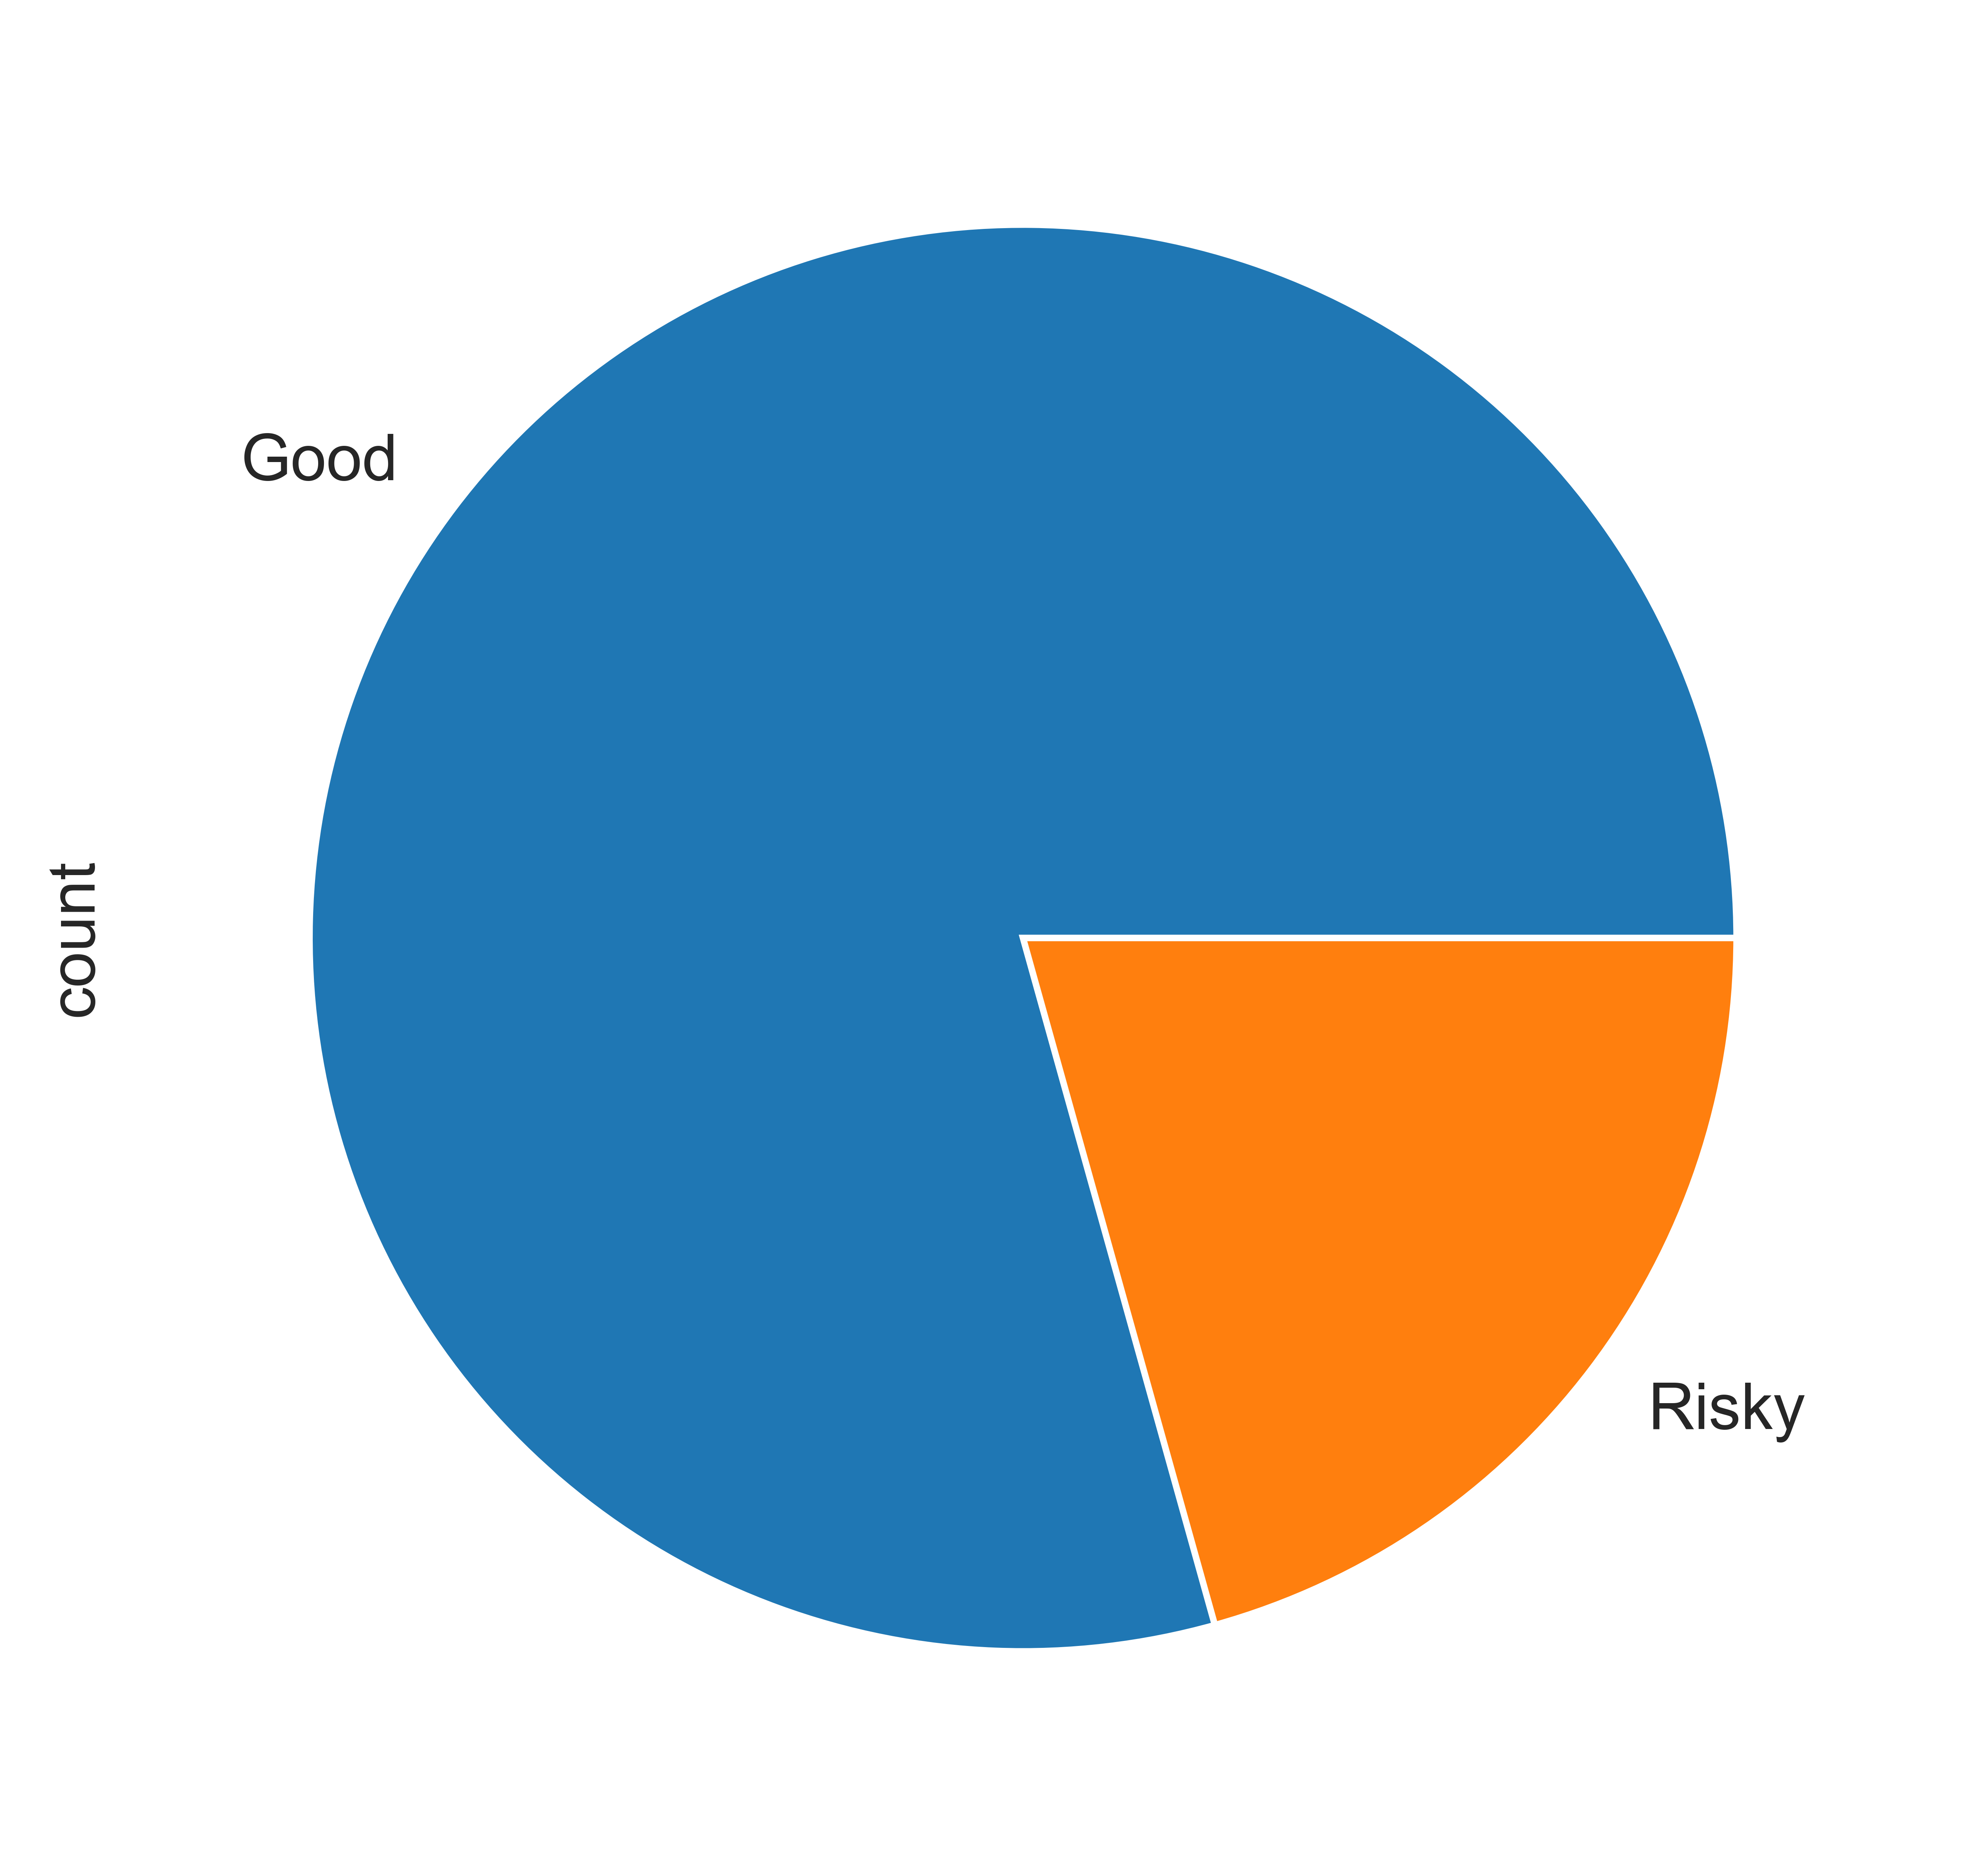

In [8]:
df['Target'].value_counts().plot(kind='pie')

In [9]:
sns.histplot(df['TaxableIncome'],kde=True)

<Axes: xlabel='TaxableIncome', ylabel='Count'>

# Decission Tree

*No need to perform scaling since Decision tree doesnot perform any distance calculation*

In [10]:
# split the feature and target
X = df.drop('Target',axis=1)
Y = df['Target']

In [11]:
oe = OrdinalEncoder()
X[['Undergrad','MaritalStatus','Urban']] = oe.fit_transform(X[['Undergrad','MaritalStatus','Urban']])

In [12]:
# split train test 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

*There are 2 type of decision trees that are available to us we are going to try out both of them*


## C5.0

In [13]:
dt_c5 = DecisionTreeClassifier(criterion='entropy').fit(xtrain,ytrain)

In [14]:
print('Test Report')
print(classification_report(ytest,dt_c5.predict(xtest)))

Test Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [15]:
print('Train Report')
print(classification_report(ytrain,dt_c5.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [16]:
print('Training accuracy: ', dt_c5.score(xtrain,ytrain))
print('Testing Accuracy: ', dt_c5.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [17]:
# perform predictions 
ypred = dt_c5.predict(xtest)
ypred

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

Text(0.5, 1.0, 'Confusion Matrix')

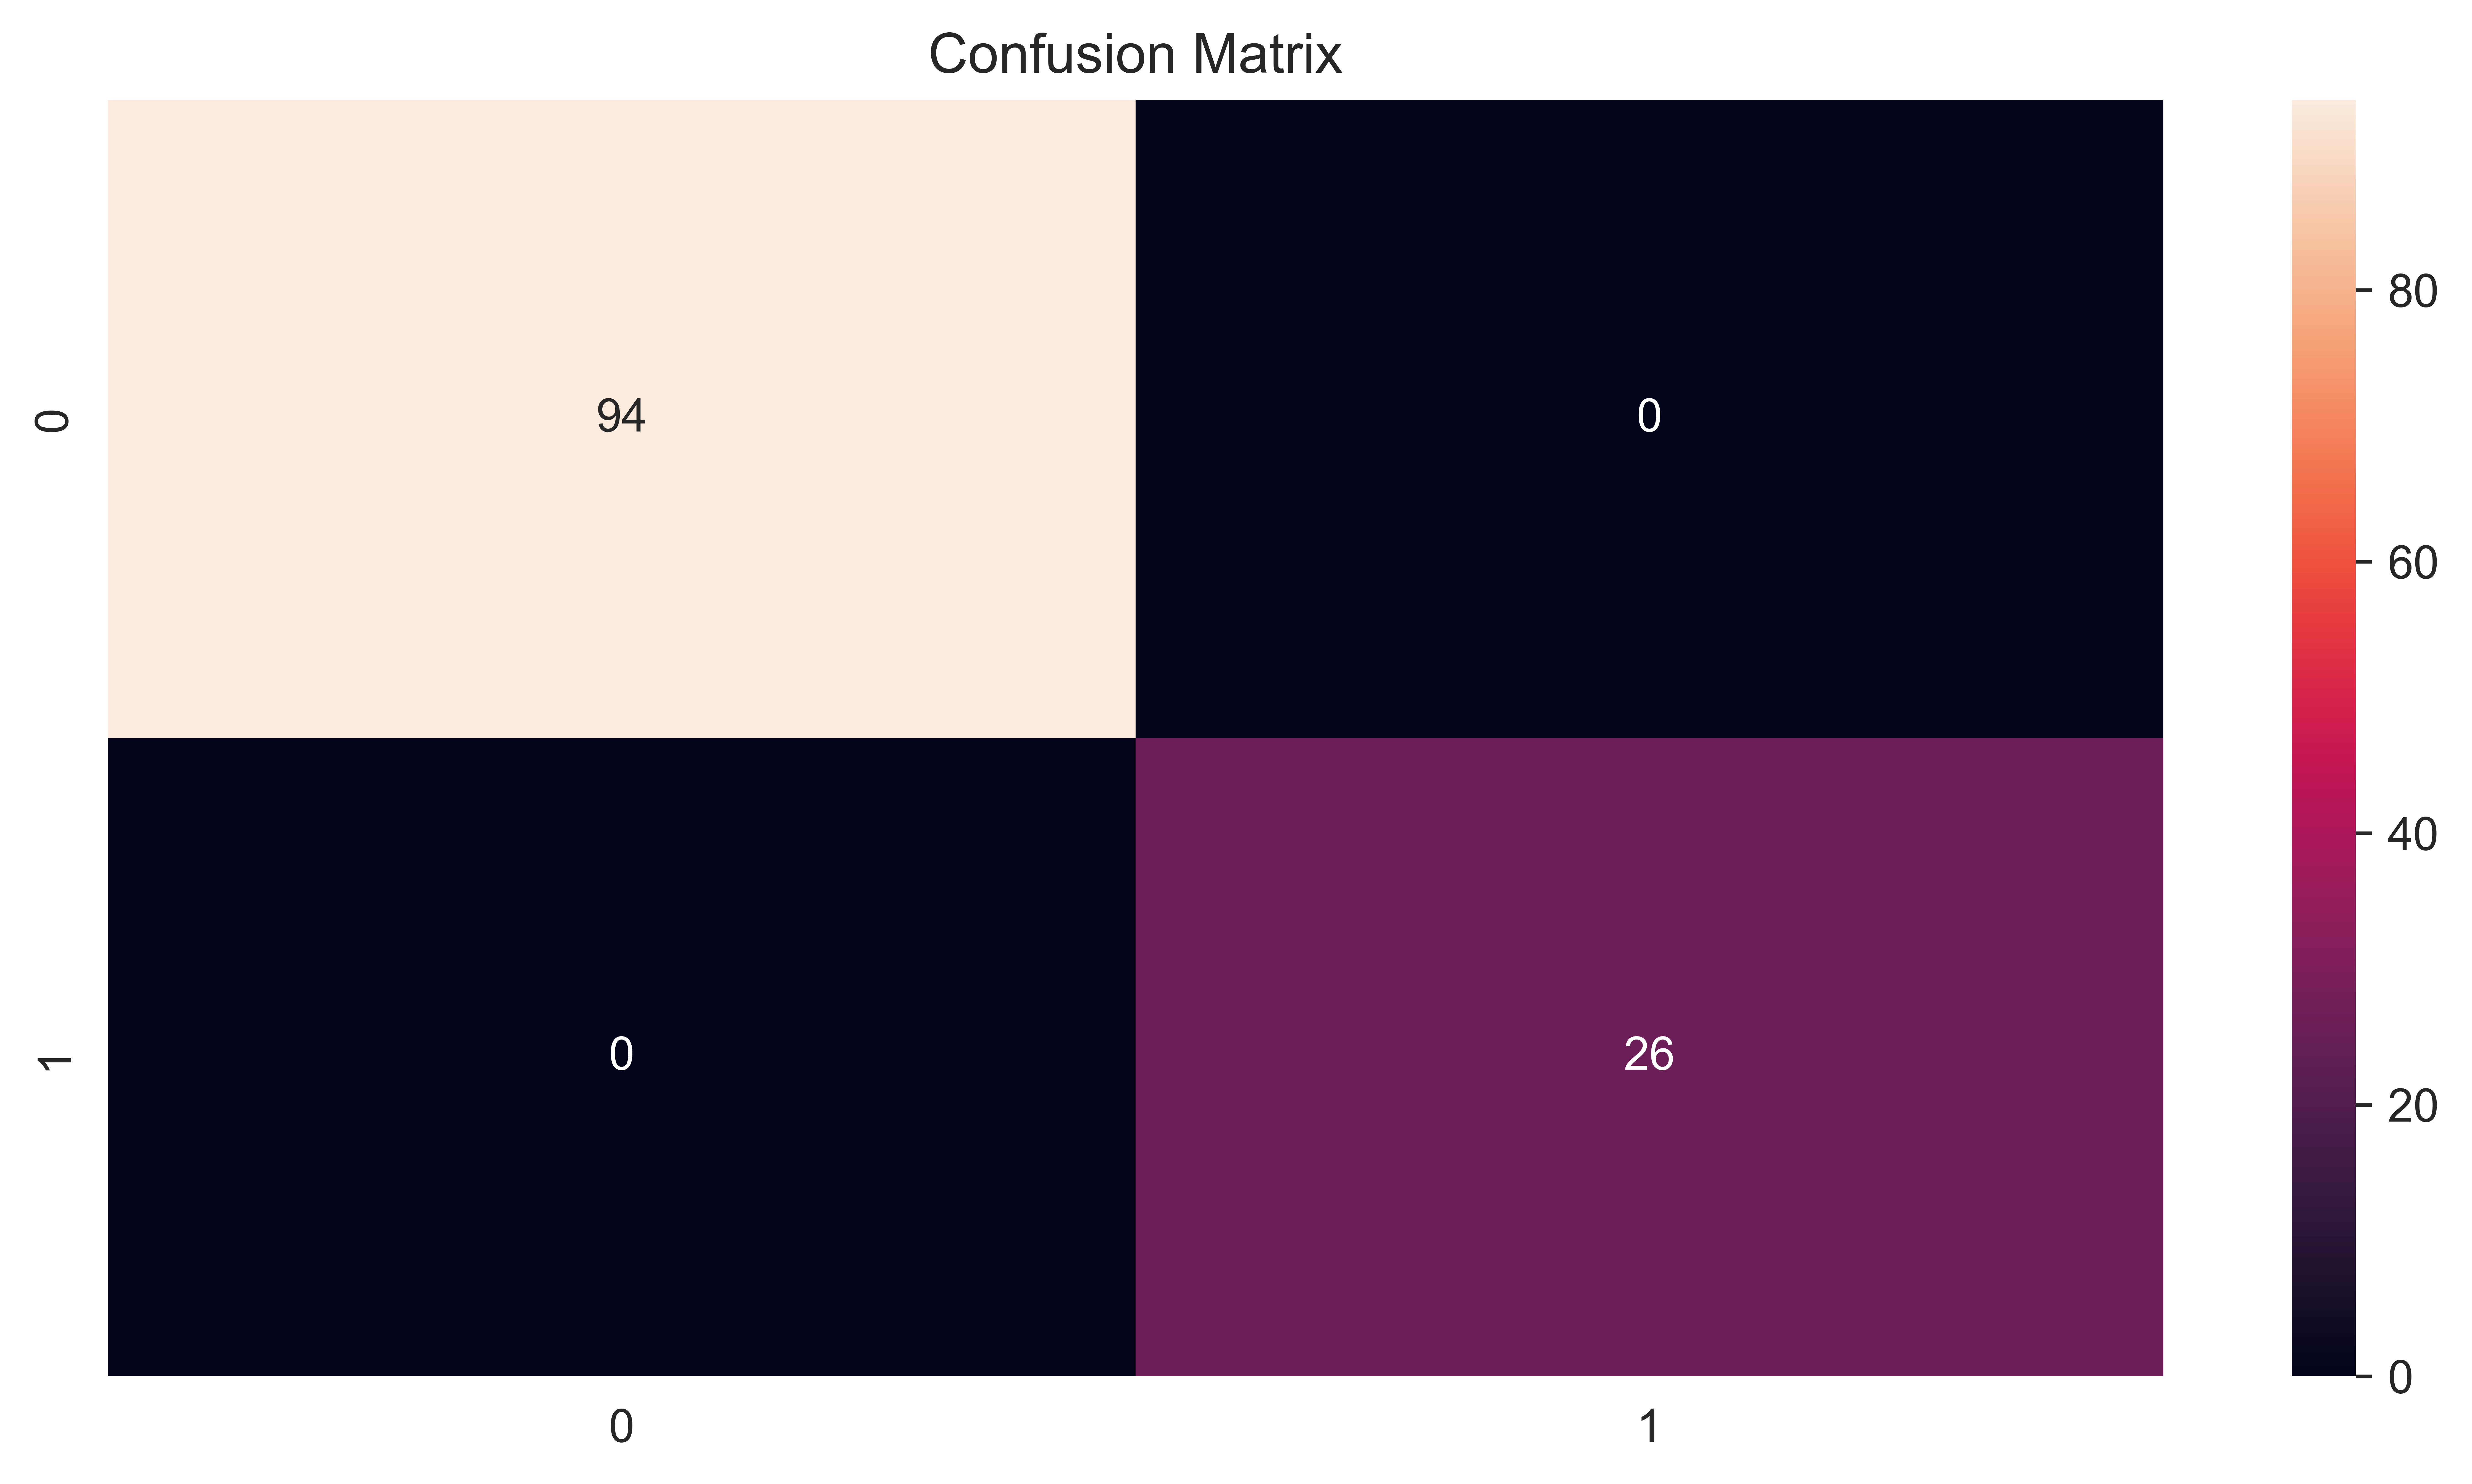

In [18]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')

[Text(0.5, 0.75, 'TaxableIncome <= 30041.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]\nclass = Good'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 98\nvalue = [0, 98]\nclass = Risky'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 382\nvalue = [382, 0]\nclass = Good')]

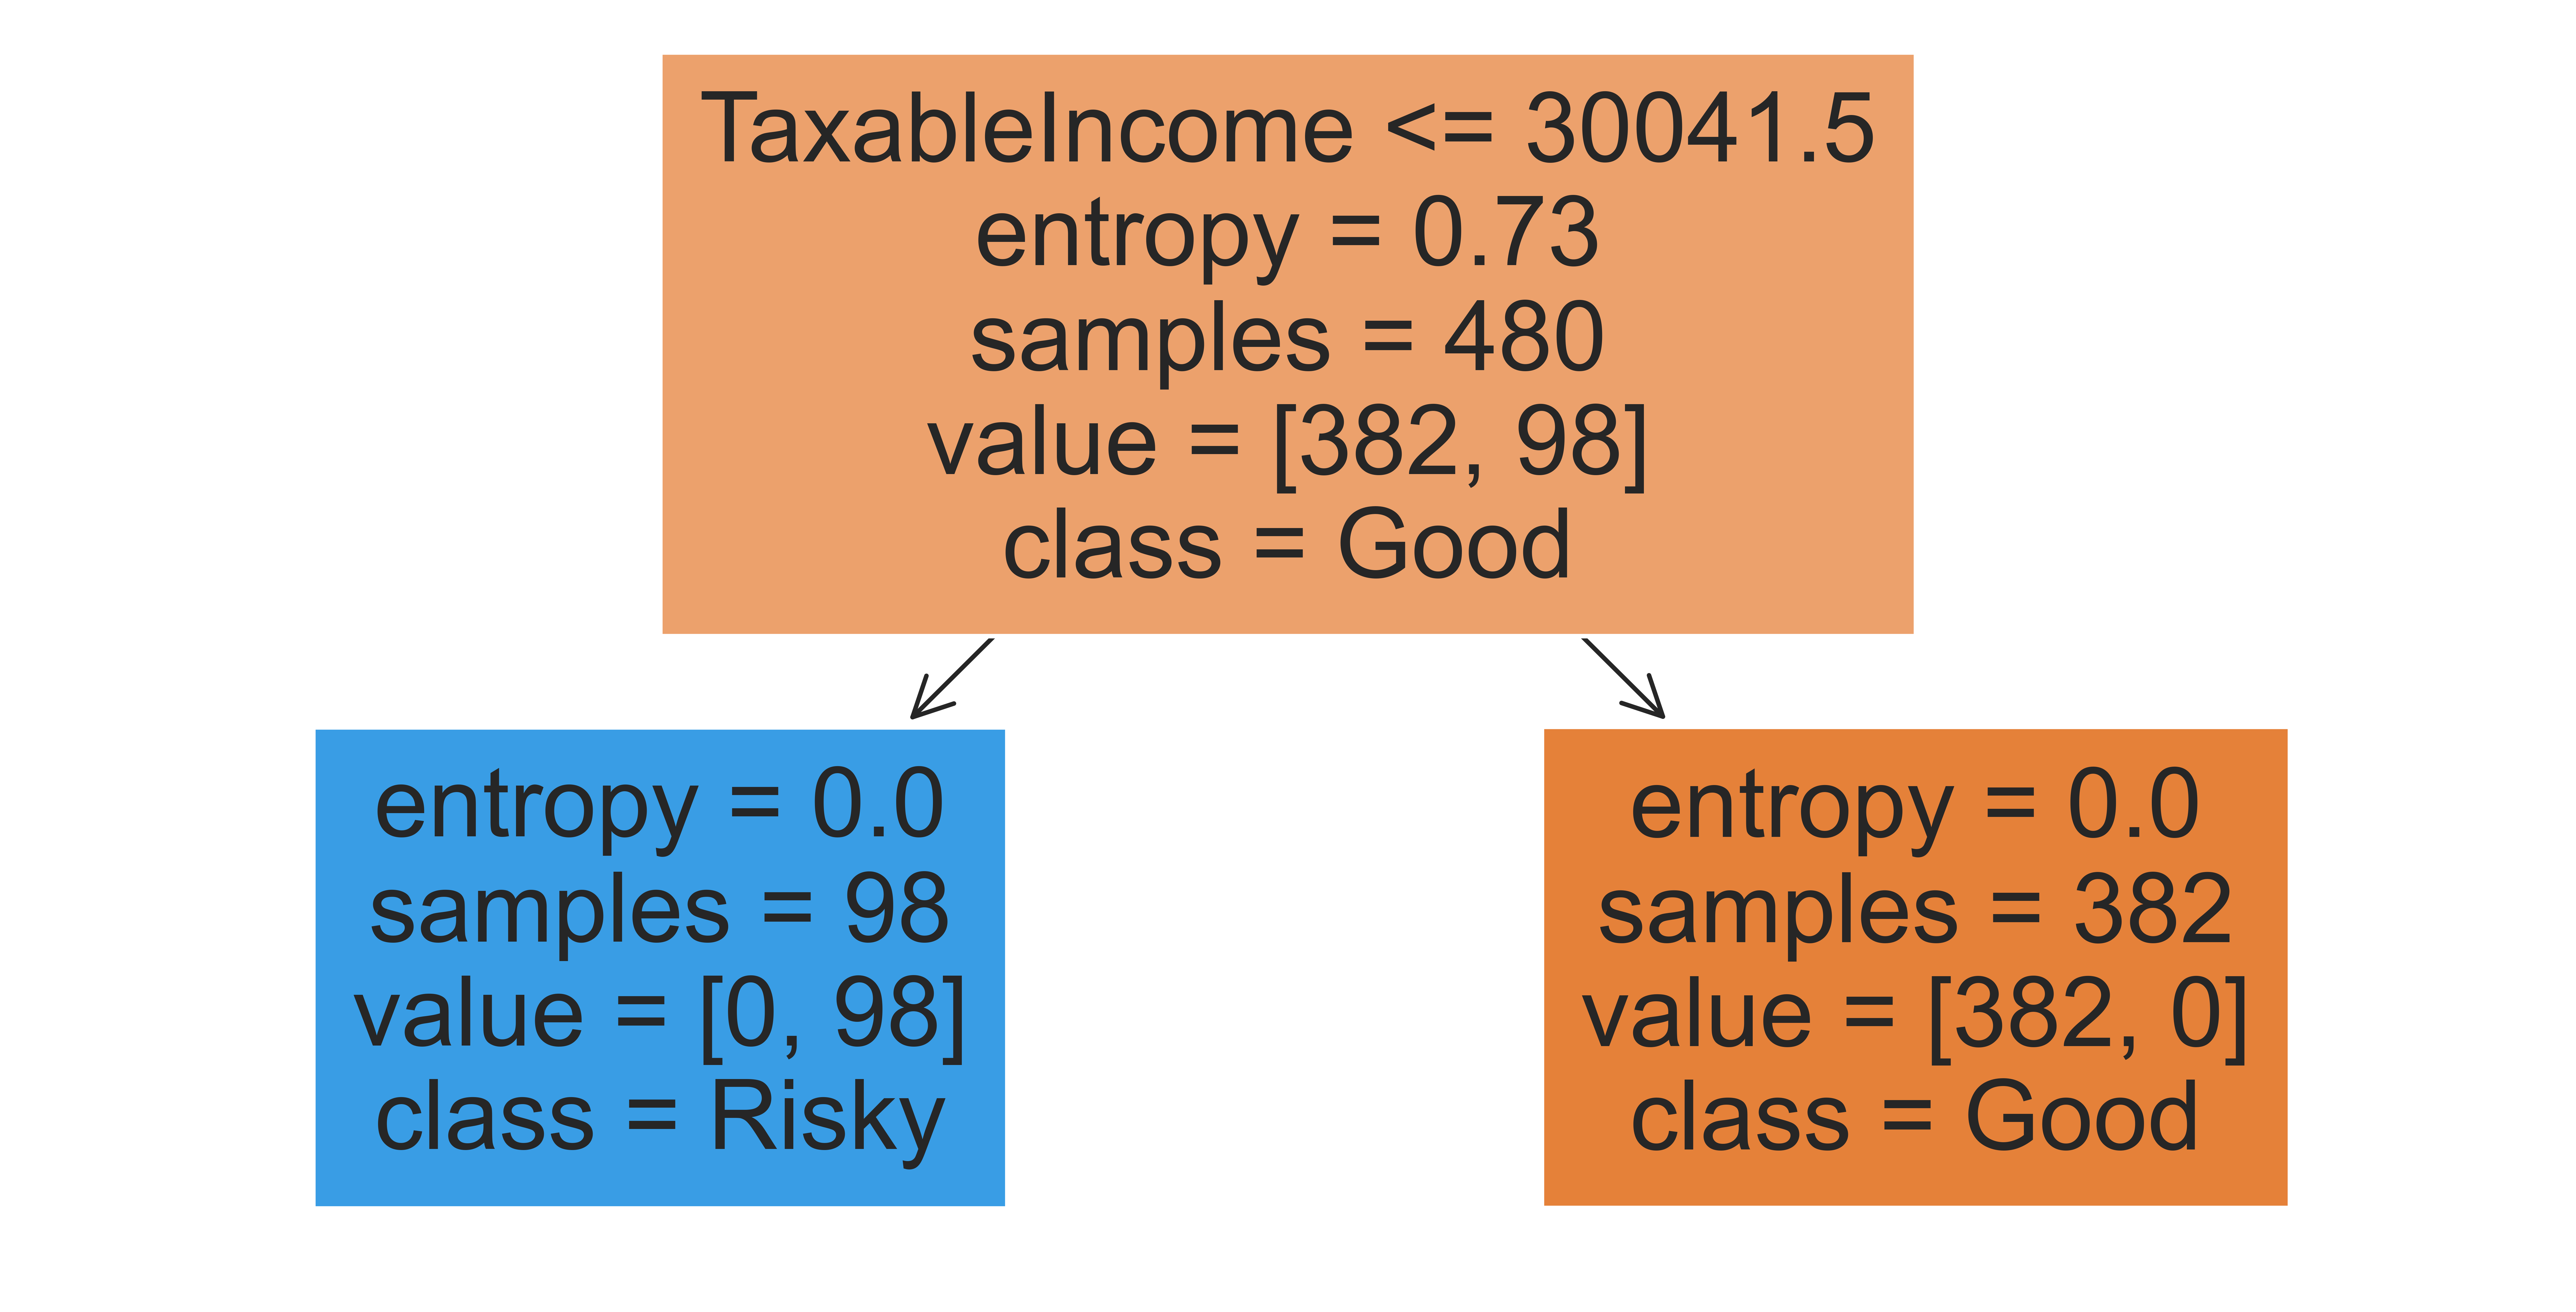

In [19]:
# This performs well lets visualize the tree
tree.plot_tree(dt_c5,feature_names=X.columns,class_names=df['Target'].unique(),filled=True)

## CART

In [20]:
dt_cart = DecisionTreeClassifier(criterion='gini').fit(xtrain,ytrain)

In [21]:
print('Training accuracy: ', dt_cart.score(xtrain,ytrain))
print('Testing Accuracy: ', dt_cart.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [22]:
print('Test Report')
print(classification_report(ytest,dt_cart.predict(xtest)))

Test Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [23]:
print('Train Report')
print(classification_report(ytrain,dt_cart.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [24]:
# perform predictions 
ypred = dt_cart.predict(xtest)
ypred

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

Text(0.5, 1.0, 'Confusion Matrix')

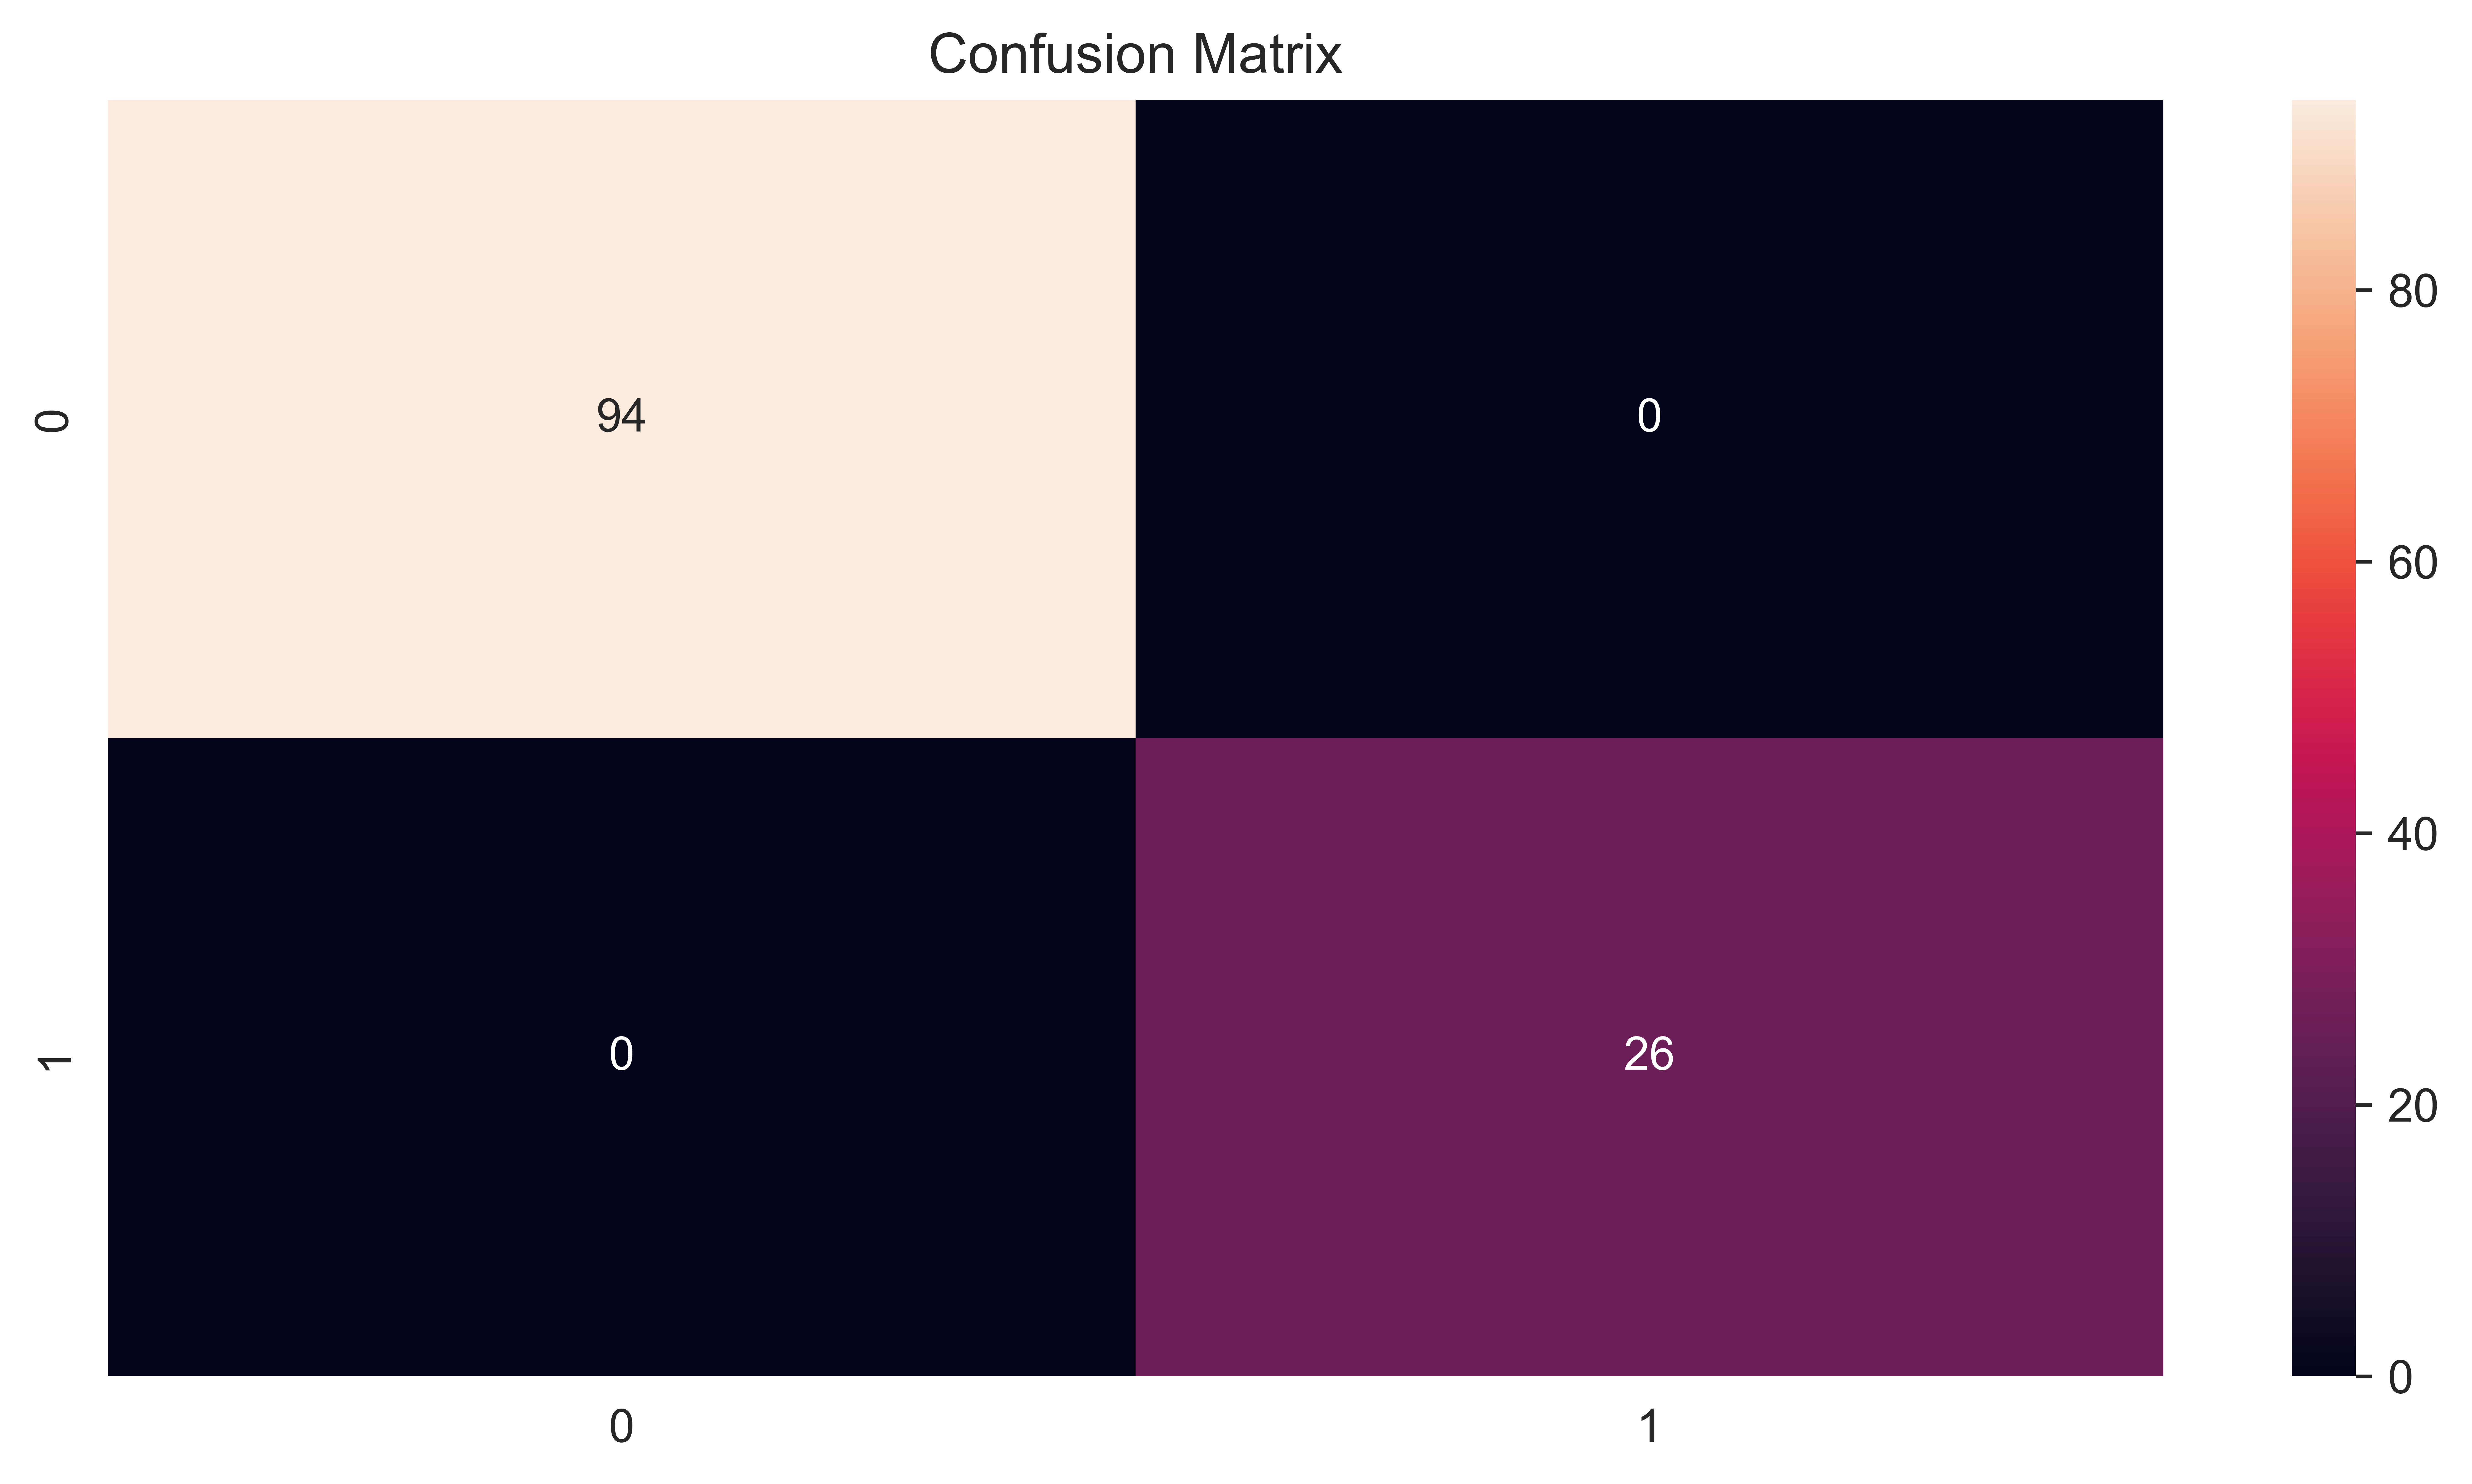

In [25]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')

[Text(0.5, 0.75, 'TaxableIncome <= 30041.5\ngini = 0.325\nsamples = 480\nvalue = [382, 98]\nclass = Good'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]\nclass = Risky'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 382\nvalue = [382, 0]\nclass = Good')]

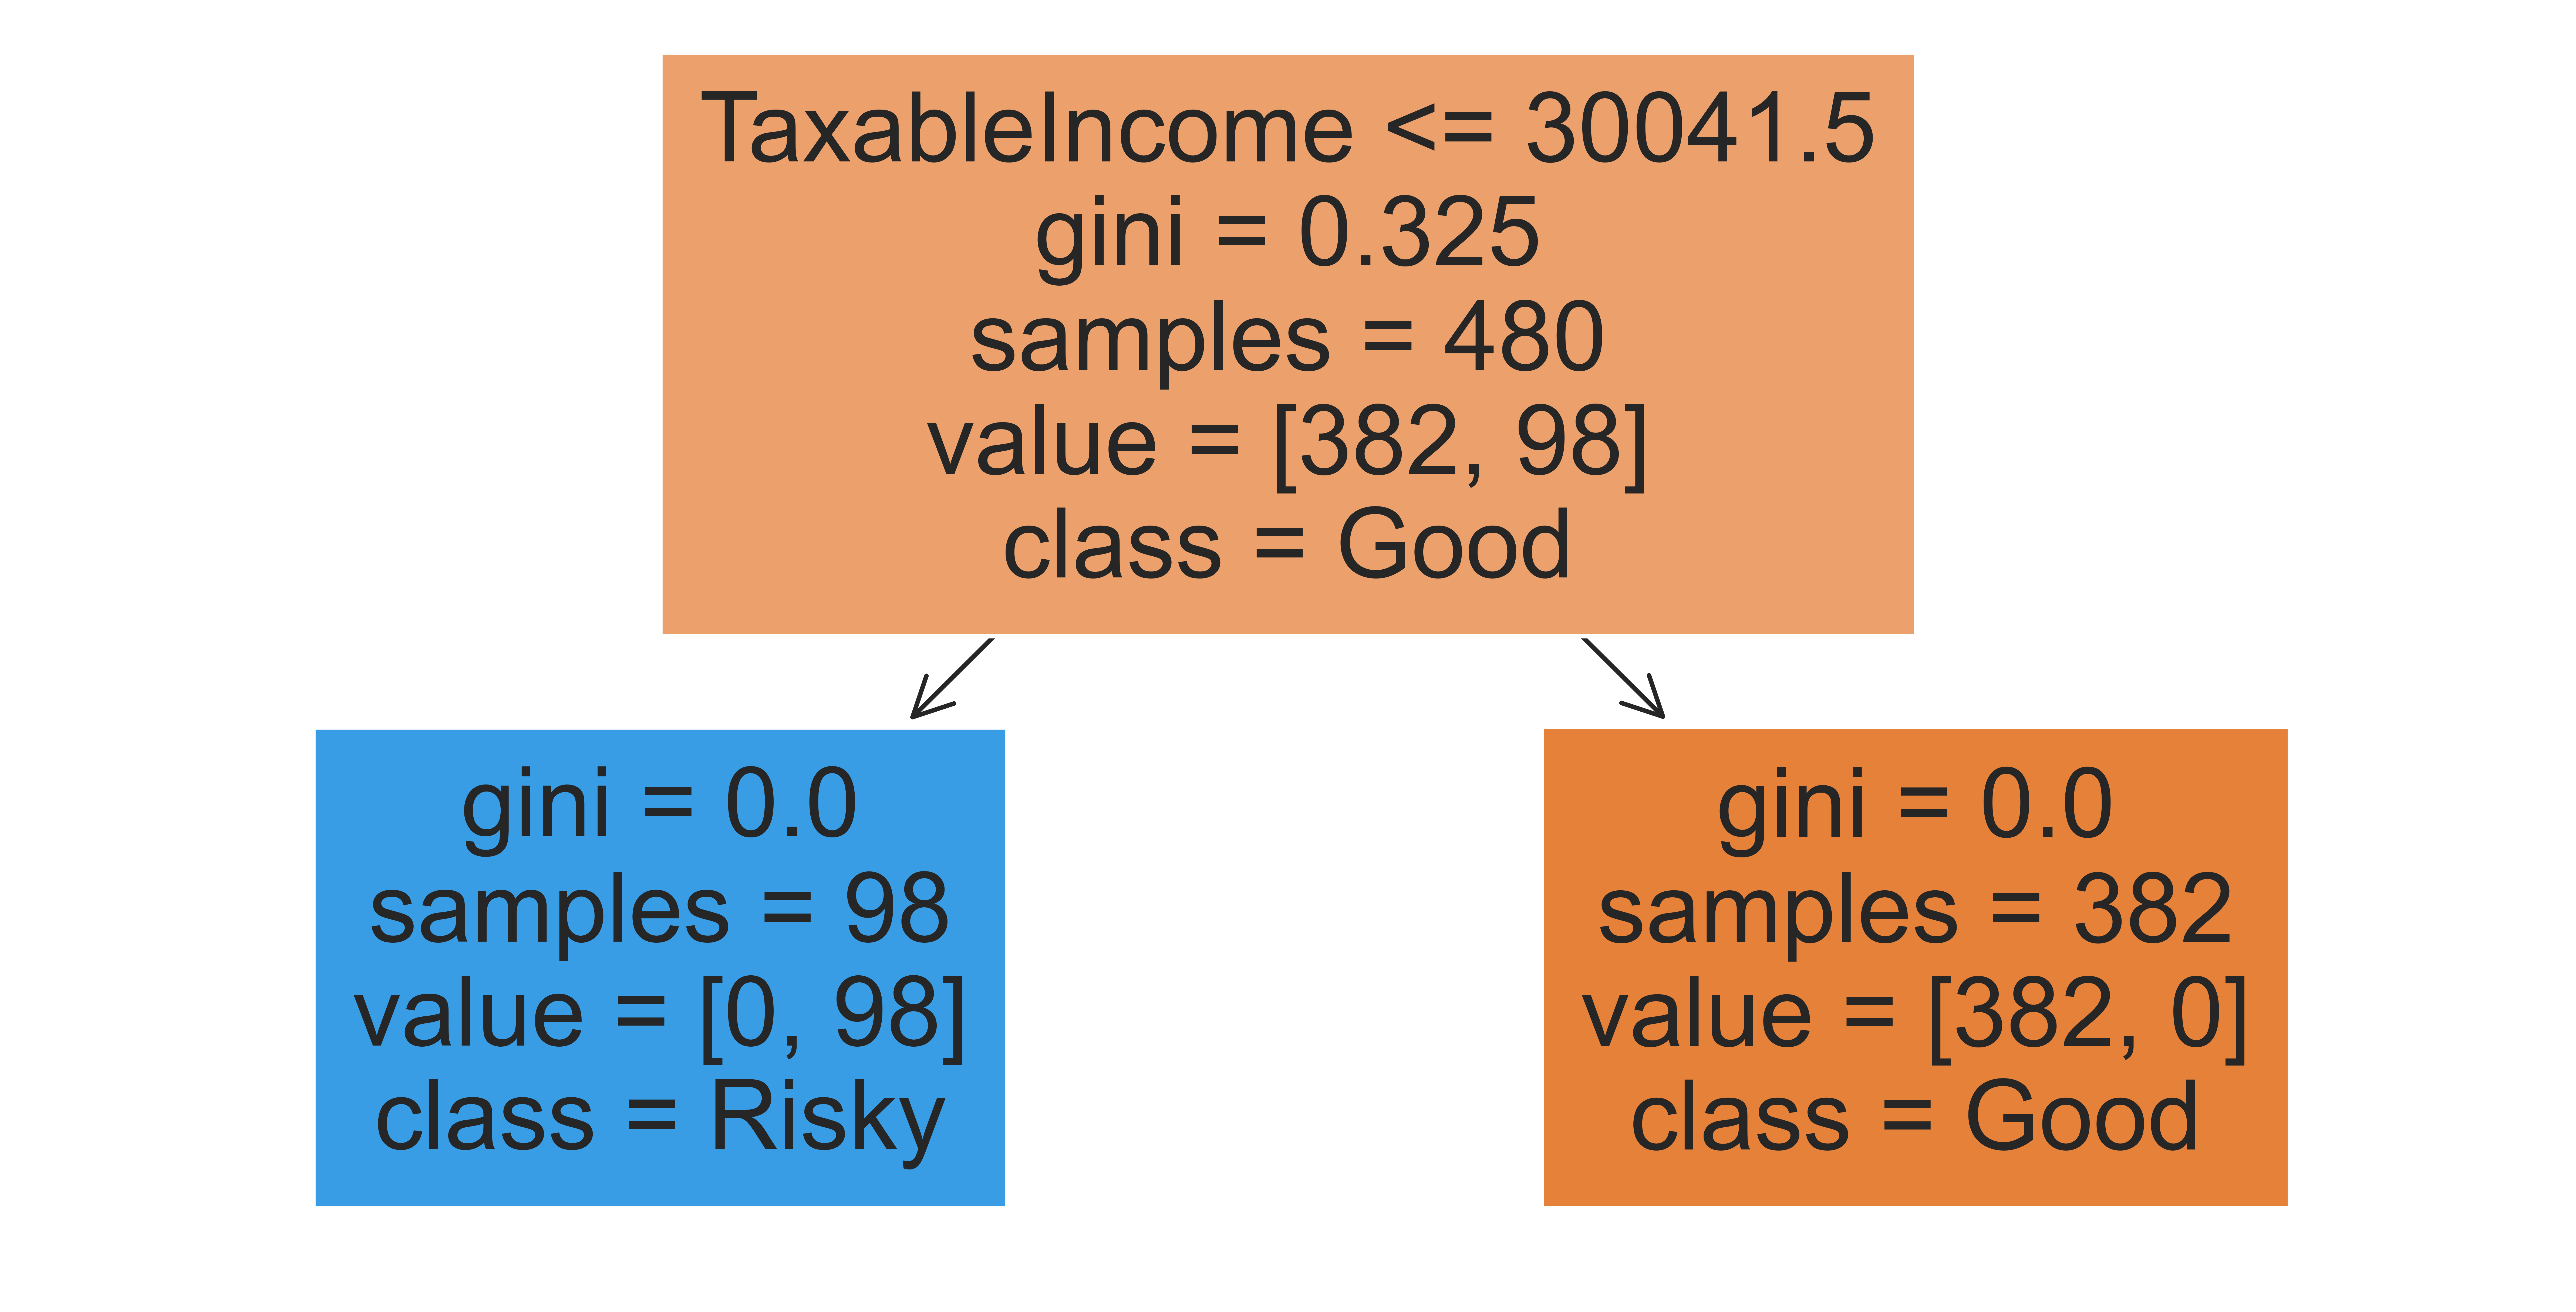

In [26]:
# This performs well lets visualize the tree
tree.plot_tree(dt_cart,feature_names=X.columns,class_names=df['Target'].unique(),filled=True)